In [ ]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126
# !pip3 install torch_geometric lightning

Looking in indexes: https://download.pytorch.org/whl/cu126
   ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
   ----------------- ---------------------- 2.6/6.1 MB 15.1 MB/s eta 0:00:01
   ---------------------------------------- 6.1/6.1 MB 16.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 GB 18.1 MB/s eta 0:02:18
   ---------------------------------------- 0.0/2.5 GB 17.4 MB/s eta 0:02:24
   ---------------------------------------- 0.0/2.5 GB 18.0 MB/s eta 0:02:18
   ---------------------------------------- 0.0/2.5 GB 18.1 MB/s eta 0:02:18
   ---------------------------------------- 0.0/2.5 GB 17.3 MB/s eta 0:02:24
   ---------------------------------------- 0.0/2.5 GB 17.6 MB/s eta 0:02:21
   ---------------------------------------- 0.0/2.5 GB 17.7 MB/s eta 0:02:20
   ---------------------------------------- 0.0/2.5 GB 17.7 MB/s eta 0:02:20
    -----------------------------

In [ ]:
# !pip3 install numpy pandas scikit-learn networkxspotif

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------- ----------------------------- 3.4/12.6 MB 18.3 MB/s eta 0:00:01
   ------------------- -------------------- 6.3/12.6 MB 16.1 MB/s eta 0:00:01
   ----------------------------- ---------- 9.2/12.6 MB 15.0 MB/s eta 0:00:01
   -------------------------------------- - 12.1/12.6 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 13.9 MB/s eta 0:00:00
Usin

  error: subprocess-exited-with-error
  
  × Building wheel for pickle5 (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [54 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-312\pickle5
      copying pickle5\pickle.py -> build\lib.win-amd64-cpython-312\pickle5
      copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-312\pickle5
      copying pickle5\__init__.py -> build\lib.win-amd64-cpython-312\pickle5
      creating build\lib.win-amd64-cpython-312\pickle5\test
      copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-312\pickle5\test
      copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-312\pickle5\test
      copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-312\pickle5\test
      copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-312\pickle5\test
      running build_ext
      building 'pickle5._pickle' exte

In [1]:
import os.path as osp
import numpy as np
import torch
import lightning
from torch_geometric.datasets import AMiner
from torch_geometric.data import HeteroData
from torch_geometric.nn import MetaPath2Vec
from torch_geometric.datasets import OGB_MAG
from torch_geometric.loader import NeighborLoader, HGTLoader

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)


# MetaPath2Vec

[paper](https://ericdongyx.github.io/papers/KDD17-dong-chawla-swami-metapath2vec.pdf)  
[code](https://github.com/rusty1s/pytorch_geometric/blob/master/examples/metapath2vec.py)

In [4]:
# load the dataset
path = osp.join('..', 'data', 'AMiner')
dataset = AMiner(path)
data = dataset[0]
print(data)
print(type(data.edge_index_dict))
print(data.edge_index_dict[('paper', 'written_by', 'author')])
print(type(data.num_nodes_dict))
print(data.num_nodes_dict)
print(type(data.y_dict))
print(data.y_dict["venue"])
print(type(data.y_index_dict))
print(data.y_index_dict["venue"])

HeteroData(
  author={
    y=[246678],
    y_index=[246678],
    num_nodes=1693531,
  },
  venue={
    y=[134],
    y_index=[134],
    num_nodes=3883,
  },
  paper={ num_nodes=3194405 },
  (paper, written_by, author)={ edge_index=[2, 9323605] },
  (author, writes, paper)={ edge_index=[2, 9323605] },
  (paper, published_in, venue)={ edge_index=[2, 3194405] },
  (venue, publishes, paper)={ edge_index=[2, 3194405] }
)
<class 'dict'>
tensor([[      0,       1,       2,  ..., 3194404, 3194404, 3194404],
        [      0,       1,       2,  ...,    4393,   21681,  317436]])
<class 'dict'>
{'author': 1693531, 'venue': 3883, 'paper': 3194405}
<class 'dict'>
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5,

In [3]:
# move the data to cpu or GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# define the model

metapath = [
    ('author', 'writes', 'paper'),
    ('paper', 'published_in', 'venue'),
    ('venue', 'publishes', 'paper'),
    ('paper', 'written_by', 'author'),
]


model = MetaPath2Vec(data.edge_index_dict,
                     embedding_dim=128,
                     metapath=metapath,
                     walk_length=5,
                     context_size=3,
                     walks_per_node=3,
                     num_negative_samples=1,
                     sparse=True
                    ).to(device)

In [5]:
# use the loader to build a loader
loader = model.loader(batch_size=128, shuffle=True, num_workers=3)
for idx, (pos_rw, neg_rw) in enumerate(loader):
    if idx == 10: break
    print(idx, pos_rw.shape, neg_rw.shape)
print(pos_rw[0],neg_rw[0])

0 torch.Size([1536, 3]) torch.Size([1536, 3])
1 torch.Size([1536, 3]) torch.Size([1536, 3])
2 torch.Size([1536, 3]) torch.Size([1536, 3])
3 torch.Size([1536, 3]) torch.Size([1536, 3])
4 torch.Size([1536, 3]) torch.Size([1536, 3])
5 torch.Size([1536, 3]) torch.Size([1536, 3])
6 torch.Size([1536, 3]) torch.Size([1536, 3])
7 torch.Size([1536, 3]) torch.Size([1536, 3])
8 torch.Size([1536, 3]) torch.Size([1536, 3])
9 torch.Size([1536, 3]) torch.Size([1536, 3])
tensor([ 835171, 2681764, 4889300]) tensor([ 835171, 1744805, 4891629])


In [6]:
# Inizialize optimizer
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)
def train(epoch, log_steps=500, eval_steps=1000):
    model.train()

    total_loss = 0
    for i, (pos_rw, neg_rw) in enumerate(loader):
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        if (i + 1) % log_steps == 0:
            print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
                   f'Loss: {total_loss / log_steps:.4f}'))
            total_loss = 0

        if (i + 1) % eval_steps == 0:
            acc = test()
            print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
                   f'Acc: {acc:.4f}'))

@torch.no_grad()
def test(train_ratio=0.1):
    model.eval()
    batch = data.y_index_dict['author']
    if isinstance(batch, torch.Tensor):
        batch = batch.to(device)
    z = model('author', batch=batch)
    y = data.y_dict['author']
    if isinstance(y, torch.Tensor):
        y = y.to(device)

    # Create permutation tensor on the same device as z
    perm = torch.randperm(z.size(0), device = z.device)
    train_perm = perm[:int(z.size(0) * train_ratio)]
    test_perm = perm[int(z.size(0) * train_ratio):]

    return model.test(z[train_perm], y[train_perm], z[test_perm],
                      y[test_perm], max_iter=150)


In [8]:
for epoch in range(1, 2):
    train(epoch)
    acc = test()
    print(f'Epoch: {epoch}, Accuracy: {acc:.4f}')

Epoch: 1, Step: 00500/13231, Loss: 1.3863
Epoch: 1, Step: 01000/13231, Loss: 1.3863
Epoch: 1, Step: 01000/13231, Acc: 0.2792
Epoch: 1, Step: 01500/13231, Loss: 1.3863
Epoch: 1, Step: 02000/13231, Loss: 1.3863
Epoch: 1, Step: 02000/13231, Acc: 0.2785
Epoch: 1, Step: 02500/13231, Loss: 1.3863
Epoch: 1, Step: 03000/13231, Loss: 1.3863
Epoch: 1, Step: 03000/13231, Acc: 0.2789
Epoch: 1, Step: 03500/13231, Loss: 1.3863
Epoch: 1, Step: 04000/13231, Loss: 1.3863
Epoch: 1, Step: 04000/13231, Acc: 0.2784
Epoch: 1, Step: 04500/13231, Loss: 1.3863
Epoch: 1, Step: 05000/13231, Loss: 1.3863
Epoch: 1, Step: 05000/13231, Acc: 0.2790
Epoch: 1, Step: 05500/13231, Loss: 1.3863
Epoch: 1, Step: 06000/13231, Loss: 1.3863
Epoch: 1, Step: 06000/13231, Acc: 0.2790
Epoch: 1, Step: 06500/13231, Loss: 1.3863
Epoch: 1, Step: 07000/13231, Loss: 1.3863
Epoch: 1, Step: 07000/13231, Acc: 0.2791
Epoch: 1, Step: 07500/13231, Loss: 1.3863
Epoch: 1, Step: 08000/13231, Loss: 1.3863
Epoch: 1, Step: 08000/13231, Acc: 0.2783


# load the model

In [5]:
device = 'cpu'
metapath = [
    ('author', 'writes', 'paper'),
    ('paper', 'published_in', 'venue'),
    ('venue', 'publishes', 'paper'),
    ('paper', 'written_by', 'author'),
]
loaded_model = MetaPath2Vec(data.edge_index_dict,
                     embedding_dim=128,
                     metapath=metapath,
                     walk_length=5,
                     context_size=3,
                     walks_per_node=3,
                     num_negative_samples=1,
                     sparse=True
                    ).to(device)

In [14]:
torch.save(model.state_dict(), "mymodel.pth")

In [6]:
#print(loaded_model.embedding.weight[1][:5])
# load the model
loaded_model.load_state_dict(torch.load("mymodel.pth", map_location=torch.device('cpu')))
# move the model to cpu


<All keys matched successfully>

In [6]:
#file = torch.load('mymodel.pth', map_location=lambda storage, loc: storage)
#loaded_model.load_state_dict(file)
print(loaded_model.embedding.weight[1][:5])

tensor([0., 0., 0., 0., 0.], grad_fn=<SliceBackward0>)


In [7]:
z_venue = loaded_model('venue', batch=data.y_index_dict['venue']).detach().numpy()
z_auth = loaded_model('author', batch=data.y_index_dict['author']).detach().numpy()
z_venue = z_venue[0:100]
z_auth = z_auth[0:100]

In [10]:
!pip install umap-learn[plot]

  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------- ----------------- 3.9/6.9 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 20.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/18.3 MB ? eta -:--:--
   ---------- ------

In [8]:
import umap
y = data.y_dict['author']
#embedder = umap.UMAP().fit(data,y)

z_venue_2d = umap.UMAP().fit_transform(z_venue)
z_auth_2d = umap.UMAP().fit_transform(z_auth)

c:\Users\subud\GitHub Projects\Graph Training\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\subud\GitHub Projects\Graph Training\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\subud\GitHub Projects\Graph Training\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [9]:
type(z_venue_2d)

numpy.ndarray

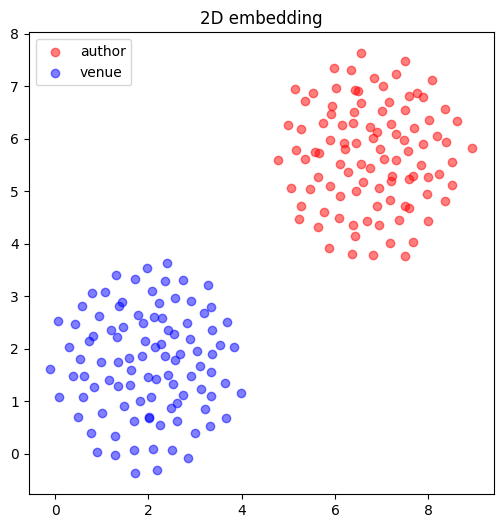

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6,6))
plt.scatter(z_auth_2d[:,0],z_auth_2d[:,1],color="red",alpha=0.5,label="author")
plt.scatter(z_venue_2d[:,0],z_venue_2d[:,1],color="blue",alpha=0.5,label="venue")
plt.legend()
plt.title("2D embedding")
plt.show()

In [ ]:
import torch_geometric.transforms as T
from torch_geometric.datasets import OGB_MAG
dataset = OGB_MAG(root='./data', preprocess='metapath2vec', transform=T.ToUndirected())

NameError: name 'OGB_MAG' is not defined